In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import airy, roots_hermite
import torch
import torch.optim as optim

torch.set_default_device('cpu')

pi = 3.14159265359
sqrt_2 = 2**.5
sqrt_pi = pi**.5

In [2]:
# gauss-hermite roots for approximating gaussian integral


In [99]:
def f(x):
    return ((torch.tanh(x) + 1)/2)**10
    # return torch.sin(x**2)
    # return torch.sin(torch.exp((x+1)/1.2))

def normpdf(x):
    return 1/(sqrt_2*sqrt_pi)*torch.exp(-x**2/2)

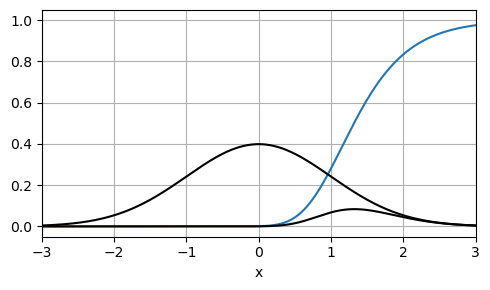

In [100]:
rx = torch.linspace(-5, 5, 10000)
dx = torch.mean(torch.diff(rx))
f_vals = f(rx)

fig, ax = plt.subplots(1, 1, figsize=(5, 3), tight_layout=True)
ax.plot(rx, f_vals)
ax.plot(rx, normpdf(rx), c='k')
ax.plot(rx, f_vals*normpdf(rx), c='k')
ax.set_xlabel('x')
ax.set_xlim(-3, 3)
ax.grid()

In [101]:
npoints = np.arange(3, 51)
itgl_vals = []
gh_vals = []

for npoint in npoints:
    rx = torch.linspace(-5, 5, npoint)
    dx = torch.mean(torch.diff(rx))
    itgl_val = torch.sum(f(rx)*normpdf(rx)*dx)
    itgl_vals.append(itgl_val)

    xs_gh, ws_gh = roots_hermite(npoint)
    
    xs_gh = torch.tensor(xs_gh, dtype=torch.float32)
    ws_gh = torch.tensor(ws_gh, dtype=torch.float32)
    
    gh_val = ws_gh@f(sqrt_2*xs_gh)/sqrt_pi
    gh_vals.append(gh_val)

Text(0.5, 0, 'npoints')

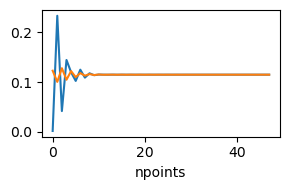

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2), tight_layout=True)
ax.plot(itgl_vals)
ax.plot(gh_vals)
ax.set_xlabel('npoints')